In [140]:
import numpy as np
import pandas as pd

In [142]:
df = pd.read_csv(r'accident_prediction_india.csv')

In [145]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3000.0,2020.530000,1.683858,2018.0,2019.0,2021.0,2022.0,2023.0
Number of Vehicles Involved,3000.0,2.996000,1.428285,1.0,2.0,3.0,4.0,5.0
Number of Casualties,3000.0,5.066000,3.214097,0.0,2.0,5.0,8.0,10.0
Number of Fatalities,3000.0,2.455333,1.717650,0.0,1.0,2.0,4.0,5.0
Speed Limit (km/h),3000.0,74.940667,26.765088,30.0,51.0,75.0,99.0,120.0
Driver Age,3000.0,44.177000,15.402860,18.0,31.0,45.0,57.0,70.0


In [147]:
df.describe(include='object').T

,count,unique,top,freq
State Name,3000,32,Goa,109
City Name,3000,28,Unknown,2138
Month,3000,12,March,266
Day of Week,3000,7,Wednesday,468
Time of Day,3000,1263,8:34,7
Accident Severity,3000,3,Minor,1034
Vehicle Type Involved,3000,7,Truck,449
Weather Conditions,3000,5,Rainy,631
Road Type,3000,4,State Highway,771
Road Condition,3000,4,Under Construction,778


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   State Name                   3000 non-null   object
 1   City Name                    3000 non-null   object
 2   Year                         3000 non-null   int64 
 3   Month                        3000 non-null   object
 4   Day of Week                  3000 non-null   object
 5   Time of Day                  3000 non-null   object
 6   Accident Severity            3000 non-null   object
 7   Number of Vehicles Involved  3000 non-null   int64 
 8   Vehicle Type Involved        3000 non-null   object
 9   Number of Casualties         3000 non-null   int64 
 10  Number of Fatalities         3000 non-null   int64 
 11  Weather Conditions           3000 non-null   object
 12  Road Type                    3000 non-null   object
 13  Road Condition               3000

In [150]:
df.isnull().sum()

State Name                       0
City Name                        0
Year                             0
Month                            0
Day of Week                      0
Time of Day                      0
Accident Severity                0
Number of Vehicles Involved      0
Vehicle Type Involved            0
Number of Casualties             0
Number of Fatalities             0
Weather Conditions               0
Road Type                        0
Road Condition                   0
Lighting Conditions              0
Traffic Control Presence       716
Speed Limit (km/h)               0
Driver Age                       0
Driver Gender                    0
Driver License Status          975
Alcohol Involvement              0
Accident Location Details        0
dtype: int64

In [151]:
value_counts = df['Traffic Control Presence'].value_counts()

for i, c in value_counts.items():
    print(f"{i}: {c}")

Signs: 812
Signals: 736
Police Checkpost: 736


In [154]:
value_counts = df['Driver License Status'].value_counts()

for i, c in value_counts.items():
    print(f"{i}: {c}")

Valid: 1057
Expired: 968


In [155]:
df.dropna(inplace=True)

In [157]:
#df['Traffic Control Presence'].fillna('Unknown', inplace=True)
#df['Driver License Status'].fillna('Unknown', inplace=True)

In [159]:
df.isnull().sum().sum()

0

In [160]:
df.groupby('Accident Severity')['Driver Age'].mean()

Accident Severity
Fatal      44.174157
Minor      44.728653
Serious    43.434524
Name: Driver Age, dtype: float64

In [162]:
df.groupby('Lighting Conditions')['Speed Limit (km/h)'].mean()

Lighting Conditions
Dark        75.248082
Dawn        74.849490
Daylight    73.237333
Dusk        73.646192
Name: Speed Limit (km/h), dtype: float64

<Axes: xlabel='Year', ylabel='count'>

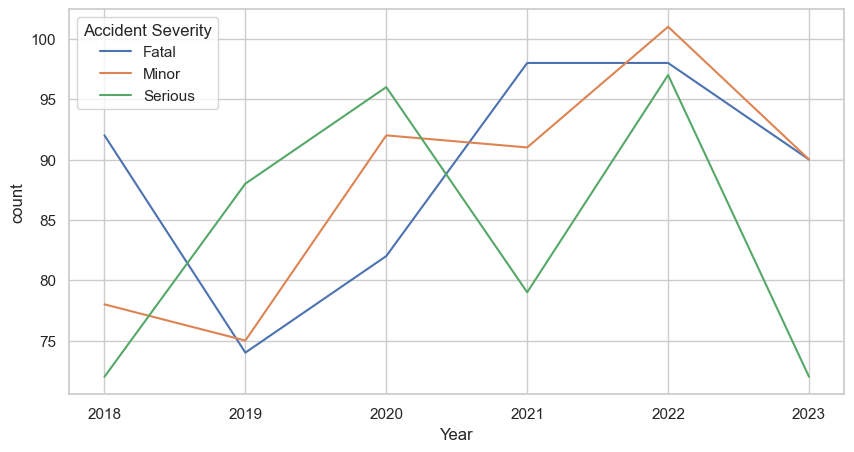

In [228]:
plt.figure(figsize=(10,5))
sns.lineplot(df.groupby(['Year','Accident Severity']).size().reset_index(name='count'), x = 'Year', y = 'count',  hue='Accident Severity')

In [168]:
df['Time in Hours'] = df['Time of Day'].apply(lambda x: int(x.split(':')[0]) + int(x.split(':')[1]) / 60)

In [170]:
df['Time in Hours'].round(2)

3        0.52
5        8.07
7       11.67
8        8.43
13       6.78
        ...  
2993     2.12
2994    10.78
2995     1.25
2997    19.57
2998    20.90
Name: Time in Hours, Length: 1565, dtype: float64

In [171]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(df[i].value_counts())
        print('*************************************')

State Name
Uttarakhand          59
Karnataka            57
Puducherry           56
Haryana              55
Goa                  55
Nagaland             54
Sikkim               54
Maharashtra          54
Delhi                53
Jammu and Kashmir    53
Kerala               52
Odisha               51
Rajasthan            51
Manipur              50
Telangana            49
Gujarat              49
West Bengal          49
Jharkhand            48
Himachal Pradesh     48
Tamil Nadu           46
Punjab               46
Uttar Pradesh        46
Assam                46
Chhattisgarh         46
Tripura              45
Meghalaya            45
Bihar                43
Mizoram              43
Chandigarh           42
Andhra Pradesh       41
Madhya Pradesh       41
Arunachal Pradesh    38
Name: count, dtype: int64
*************************************
City Name
Unknown          1119
Bangalore          22
Jodhpur            20
Mysore             20
New Delhi          20
Nagpur             19
Dwarka         

In [174]:
def assign_time_segment(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply function to the column
df['Time Segment'] = df['Time in Hours'].apply(assign_time_segment)


In [176]:
df[['Time Segment','Time in Hours']]

,Time Segment,Time in Hours
3,Night,0.516667
5,Morning,8.066667
7,Morning,11.666667
8,Morning,8.433333
13,Morning,6.783333
...,...,...
2993,Night,2.116667
2994,Morning,10.783333
2995,Night,1.250000
2997,Evening,19.566667


In [180]:
import matplotlib.pyplot as plt 
import seaborn as sns

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


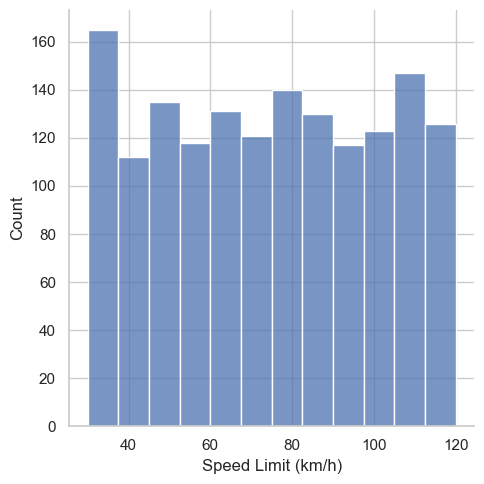

In [182]:
sns.displot(df, x = 'Speed Limit (km/h)')

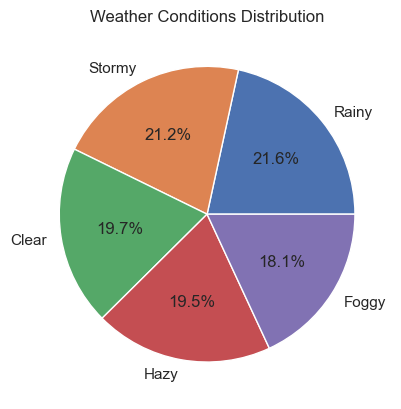

In [184]:
weather_counts = df['Weather Conditions'].value_counts()
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%')
plt.title('Weather Conditions Distribution')
plt.show()

<Axes: xlabel='Number of Vehicles Involved'>

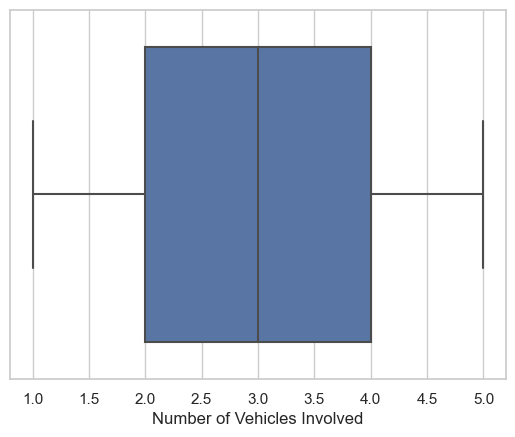

In [186]:
sns.boxplot(df, x='Number of Vehicles Involved') 

<Axes: xlabel='Driver Age'>

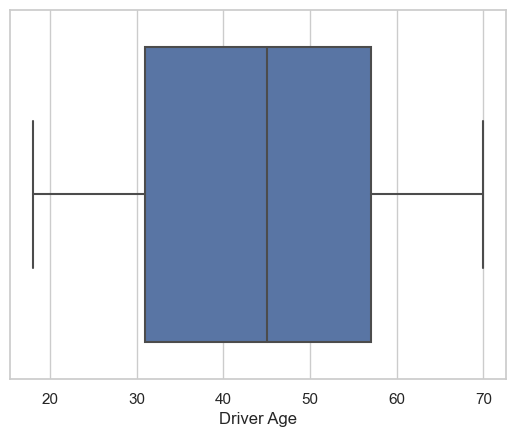

In [188]:
sns.boxplot(df, x='Driver Age') 

In [194]:
dummies = pd.get_dummies(data = df, columns = ['State Name','Month','Day of Week','Vehicle Type Involved','Road Type','Road Condition','Lighting Conditions','Traffic Control Presence','Driver Gender','Driver License Status','Alcohol Involvement','Accident Location Details','Weather Conditions','Time Segment'],
                  drop_first = True)

dummies.head()

,City Name,Year,Time of Day,Accident Severity,Number of Vehicles Involved,Number of Casualties,Number of Fatalities,Speed Limit (km/h),Driver Age,Time in Hours,...,Accident Location Details_Curve,Accident Location Details_Intersection,Accident Location Details_Straight Road,Weather Conditions_Foggy,Weather Conditions_Hazy,Weather Conditions_Rainy,Weather Conditions_Stormy,Time Segment_Evening,Time Segment_Morning,Time Segment_Night
3,Lucknow,2020,0:31,Minor,3,10,5,76,34,0.516667,...,False,False,True,False,False,True,False,False,False,True
5,Unknown,2020,8:4,Serious,1,6,2,48,44,8.066667,...,False,False,False,False,False,False,True,False,True,False
7,Unknown,2022,11:40,Minor,3,1,5,62,42,11.666667,...,True,False,False,False,False,False,False,False,True,False
8,Jodhpur,2021,8:26,Fatal,3,7,1,35,53,8.433333,...,False,False,True,False,False,False,False,False,True,False
13,Unknown,2020,6:47,Serious,5,0,0,98,44,6.783333,...,False,False,False,True,False,False,False,False,True,False


Dropping "City Name" as it has 1119 unknown values.

In [198]:
dummies.drop(['City Name','Time of Day','Time in Hours'], axis = 1, inplace = True)

In [200]:
dummies['Accident Severity'].replace(['Minor', 'Serious','Fatal'], [0, 1, 2], inplace = True)

In [202]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [204]:
X = dummies.drop('Accident Severity', axis=1)
y = dummies['Accident Severity']

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [208]:
logit = LogisticRegression(solver = 'newton-cg', n_jobs=-1)
logit.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, solver='newton-cg')

In [209]:
pred_train = logit.predict(X_train)
pred_test = logit.predict(X_test)

In [210]:
from sklearn.metrics import classification_report

print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.47      0.51      0.49       369
           1       0.47      0.44      0.45       353
           2       0.47      0.46      0.47       373

    accuracy                           0.47      1095
   macro avg       0.47      0.47      0.47      1095
weighted avg       0.47      0.47      0.47      1095



In [211]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.37      0.35      0.36       158
           1       0.34      0.34      0.34       151
           2       0.31      0.34      0.32       161

    accuracy                           0.34       470
   macro avg       0.34      0.34      0.34       470
weighted avg       0.34      0.34      0.34       470

